In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None

In [4]:
if 'snakemake' in locals():
    print('Snakemake')
    print(f'{snakemake.input}')
    
    # read in file inputs
    df_fam = pd.read_csv(snakemake.input.pop_file, delim_whitespace=True, header=None)
    df_bim = pd.read_csv(snakemake.input.chrom_file, delim_whitespace=True, header=None)
    df_kin = pd.read_csv(snakemake.input.kin_file, delim_whitespace=True)
    df_sexcheck = pd.read_csv(snakemake.input.sexcheck_file, delim_whitespace=True)
    df_hwe = pd.read_csv(snakemake.input.hwe_file, delim_whitespace=True)
    frq_tbl = pd.read_csv(snakemake.input.frq_file, delim_whitespace=True)
    het_tbl = pd.read_csv(snakemake.input.het_file, delim_whitespace=True)
    imiss_tbl = pd.read_csv(snakemake.input.imiss_file, delim_whitespace=True)
    lmiss_tbl = pd.read_csv(snakemake.input.lmiss_file, delim_whitespace=True)
    #kin0_tbl = pd.read_csv(snakemake.input.kin0_file, delim_whitespace=True)
    
    # read in paramaters from snakemake file
    Error_one = f'Error == {snakemake.params.Error_one}'
    Error_two = f'Error == {snakemake.params.Error_two}'
    Kinship = f'Kinship >= {snakemake.params.Kinship}'
    SNPSEX = f'SNPSEX == {snakemake.params.SNPSEX}'
    P = f'P <= {snakemake.params.P}'
    f_bound = snakemake.params.f_bound
    imiss_range = snakemake.params.imiss_range
    lmiss_range = snakemake.params.lmiss_range
    
    sample_flags_file_name = str(snakemake.output.sample_flags)
    marker_flags_file_name = str(snakemake.output.marker_flags)
else:
    print('local')
    path = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/'
    s_studyid = 'GECOPD'
    
    frq_file = path+s_studyid+'_annotated_plink_merged.frq'
    het_file = path+s_studyid+'_annotated_plink_merged.het'
    imiss_file = path+s_studyid+'_annotated_plink_merged.imiss'
    lmiss_file = path+s_studyid+'_annotated_plink_merged.lmiss'
    #kin0_file = '/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_king.kin0'
    
    df_fam = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/GECOPD_annotated_plink_merged.fam", delim_whitespace=True, header=None)
    df_bim = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/sav/GECOPD_annotated_plink_merged.bim.original", delim_whitespace=True, header=None)
    df_kin = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.kin", delim_whitespace=True)
    df_sexcheck = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.sexcheck", delim_whitespace=True)
    df_hwe = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.hwe", delim_whitespace=True)
    frq_tbl = pd.read_csv(frq_file, delim_whitespace=True)
    het_tbl = pd.read_csv(het_file, delim_whitespace=True)
    imiss_tbl = pd.read_csv(imiss_file, delim_whitespace=True)
    lmiss_tbl = pd.read_csv(lmiss_file, delim_whitespace=True)
    #kin0_tbl = pd.read_csv(kin0_file, delim_whitespace=True)
    
    
    Error_one = "Error == 1"
    Error_two = "Error == 0.5"
    Kinship = "Kinship >= 0.354"
    SNPSEX = "SNPSEX == 0"
    P = "P <= 0.000001"
    f_bound = 0.2
    imiss_range = [10,20]
    lmiss_range = [1,5]
    
    sample_flags_file_name = "flags/GECOPD_samples.csv"
    marker_flags_file_name = "flags/GECOPD_samples.csv"

local


### GECOPD_annotated_plink_merged.fam
#### Show population details

In [5]:
print("Population...")
print("# of Rows: " + str(df_fam.shape[0]))
print("# of Columns: " + str(df_fam.shape[1]))

Population...
# of Rows: 10588
# of Columns: 6


In [6]:
# Show null/missing values per column
df_fam.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [7]:
# Ensure that column 1 has no repeated values
assert(df_fam[1].value_counts().sum() == df_fam.shape[0])

### GECOPD_annotated_plink_merged.bim
#### Show counts/total for column 0

In [8]:
print("# of rows in column 0: " + str(df_bim[0].count()))

# of rows in column 0: 55104308


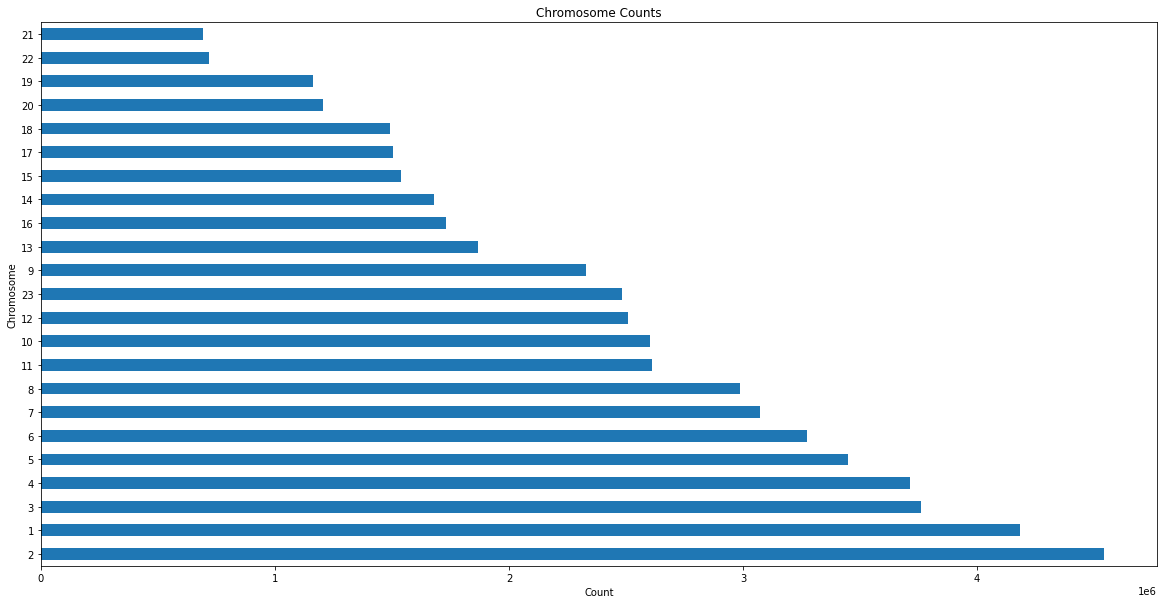

In [9]:
f_plot = plt.figure()
f_plot.set_figwidth(20)
f_plot.set_figheight(10)

df_bim[0].value_counts().plot(kind= "barh");
plt.title("Chromosome Counts");
plt.ylabel("Chromosome");
plt.xlabel("Count");

In [10]:
''' Shows the number of rows and the number of lost rows given certain query contrainsts on a DataFrame

Input:
    - df: DataFrame with data of interest
    - constraints: List of querry strings 
    
Output:
    - result_df: DataFrame showing row count and rows lost
'''
def generate_lost_df(df, constraints):
    diff_data = {}
    
    for curr in constraints:
        df_contrained = df.query(curr)
        diff_data[curr] = [df_contrained.shape[0]]
        
    result_df = pd.DataFrame(data=diff_data, index=["Row Count for Provided Constraint"])
        
    return result_df

### GECOPD_annotated_plink_merged.kin

#### Show Error=1, Error=0.5, Kinship >= 0.354

In [11]:
kin_lost_df = generate_lost_df(df_kin, [Error_one, Error_two, Kinship])
kin_lost_df

,Error == 1,Error == 0.5,Kinship >= 0.354
Row Count for Provided Constraint,29346,1816277,164


In [12]:
# flagged samples df_kin
# NOTE: Include ID1 and ID2 in flagged dataframe
df_kin["Reason"] = Error_one
df_kin_flagged_error_one_ID1 = df_kin.query(Error_one)[["ID1", "Reason"]]
df_kin_flagged_error_one_ID2 = df_kin.query(Error_one)[["ID2", "Reason"]]

df_kin["Reason"] = Error_two
df_kin_flagged_error_two_ID1 = df_kin.query(Error_two)[["ID1", "Reason"]]
df_kin_flagged_error_two_ID2 = df_kin.query(Error_two)[["ID2", "Reason"]]

df_kin["Reason"] = Kinship
df_kin_flagged_kinship_ID1 = df_kin.query(Kinship)[["ID1", "Reason"]]
df_kin_flagged_kinship_ID2 = df_kin.query(Kinship)[["ID2", "Reason"]]

### GECOPD_annotated_plink_merged.sexcheck

#### Histogram of F

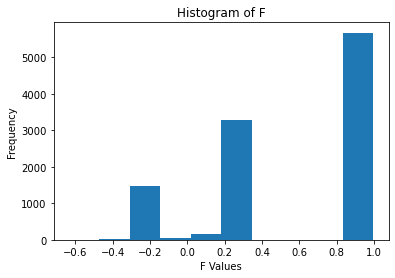

In [13]:
plt.hist(df_sexcheck["F"]);
plt.title("Histogram of F");
plt.ylabel("Frequency");
plt.xlabel("F Values");

#### Table of SNPSEX == 0

In [14]:
df_sexcheck_lost = generate_lost_df(df_sexcheck, [SNPSEX])
df_sexcheck_lost

,SNPSEX == 0
Row Count for Provided Constraint,3060


In [15]:
# flagged samples df_sexcheck
df_sexcheck["Reason"] = SNPSEX
df_sexcheck_flagged = df_sexcheck.query(SNPSEX)[["IID", "Reason"]]

#### Count of each SNPSEX value

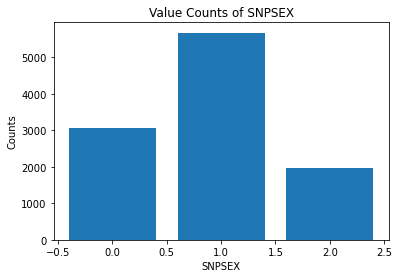

In [16]:
df_sex_value_counts = df_sexcheck["SNPSEX"].value_counts()

plt.bar(df_sex_value_counts.index, df_sex_value_counts.values);
plt.title("Value Counts of SNPSEX");
plt.xlabel("SNPSEX");
plt.ylabel("Counts");

### GECOPD_annotated_plink_merged.hwe
#### P <= configured threshold (default=1x10^-6)

In [17]:
df_hwe_lost = generate_lost_df(df_hwe, [P])
df_hwe_lost

,P <= 0.000001
Row Count for Provided Constraint,4695395


In [18]:
# flagged markers df_hwe
df_hwe["Reason"] = P
df_hwe_flagged = df_hwe.query(P)[["SNP", "Reason"]]

### F coefficent estimates

Samples out of range: 4



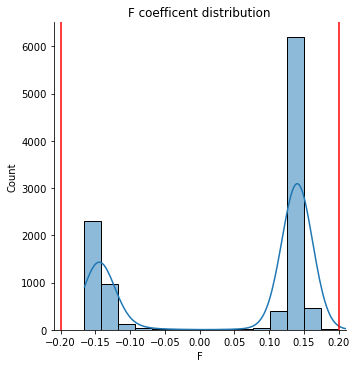

In [19]:
def tbl_filtered_fcoe(f):
    
    print('Samples out of range: '+ str(het_tbl['IID'].size - het_tbl.query('F >= -0.2 and F <= 0.2')['IID'].size) + '\n')
    return het_tbl.query('F >= -'+str(f)).query('F <= '+str(f))

tbl_filtered_fcoe(f_bound)

#for the csv of flagged samples
het_sampleflagged = het_tbl.query('F < -0.2 or F > 0.2')

#plots:
plot = sns.displot(het_tbl['F'], kde=True).set(xlim=(-0.21, 0.21))
plt.axvline(0.2).set(color='red')
plt.axvline(-0.2).set(color='red')
plt.title("F coefficent distribution")
plt.show()

### Minor Allele Frequency 

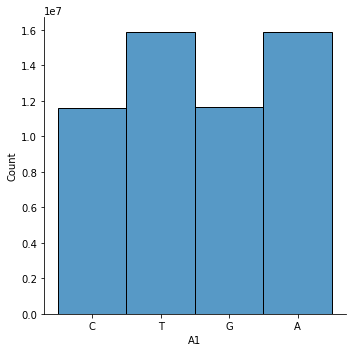

In [20]:
#Which allele is more common and percent of less common allele
frq_tbl.head()
#plots 
sns.displot(frq_tbl['A1'])

### Sample based missing data

               Num of samples
F_MISS % > _%                
total samples           10588
10                         24
11                         21
12                         19
13                         17
14                         16
15                         16
16                         14
17                         10
18                          9
19                          7
20                          7




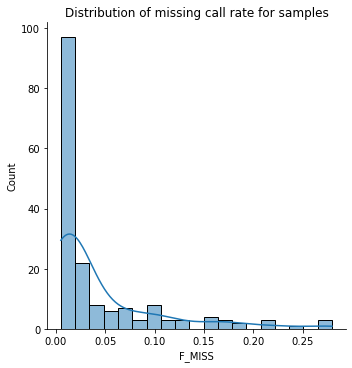

In [21]:
# how many individuals removed from data based on threshold 
def filter_missingdata(threshold, tbl):
    total = len(tbl.index)
    filtered = len(tbl.query('F_MISS >'+str(threshold)).index)
    ppl_removed = 'Number of samples: '+str(filtered)
    return filtered

def missingness_range(rnge, tbl):
    bounds = []
    bounds.append(filter_missingdata((0), tbl))
    percents = ['total samples']
    for per in range(rnge[0],rnge[1]+1):
        percents.append(per)
        size = filter_missingdata((per/100), tbl)
        bounds.append(size)

    d = {'Num of samples': bounds}
    df = pd.DataFrame(data=d, index=percents)
    df.index.name = 'F_MISS % > _%'
    return df

print(missingness_range(imiss_range, imiss_tbl))
print('\n')

#plots:
sns.displot(imiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)
plt.title('Distribution of missing call rate for samples')
plt.show()

### Variant based missing data

               Num of samples
F_MISS % > _%                
total samples        38558313
1                      238396
2                           0
3                           0
4                           0
5                           0




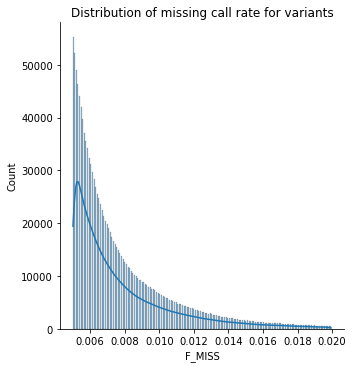

In [22]:
print(missingness_range(lmiss_range, lmiss_tbl))
print('\n')
#plots 
sns.displot(lmiss_tbl.query('F_MISS > 0.005')['F_MISS'], kde=True)
plt.title('Distribution of missing call rate for variants')
plt.show()

In [23]:
#samples flagged based on missingness 
imiss_sampleflagged = imiss_tbl.query('F_MISS > 0.1')

#markers flagged based on missingness
lmiss_sampleflagged = lmiss_tbl.query('F_MISS > 0.01')

In [30]:
#sample 
het_sampleid = het_sampleflagged.filter(['IID'])
het_sampleid['Reason'] = 'F < -0.2 or F > 0.2'

imiss_sampleid = imiss_sampleflagged.filter(['IID'])
imiss_sampleid['Reason'] = 'F_MISS > 0.1'

flagged_samples = het_sampleid.append([imiss_sampleid, df_kin_flagged_error_one_ID1, df_kin_flagged_error_one_ID2,
                                       df_kin_flagged_error_two_ID1, df_kin_flagged_error_two_ID1,
                                       df_kin_flagged_kinship_ID1, df_kin_flagged_kinship_ID2,
                                       df_sexcheck_flagged])
flagged_samples.reset_index(drop=True , inplace=True)

flagged_samples.to_csv(sample_flags_file_name)


#markers
lmiss_sampleid = lmiss_sampleflagged.filter(['SNP'])
lmiss_sampleid['Reason'] = 'F_MISS > 0.01'

flagged_markers = lmiss_sampleid.append(df_hwe_flagged)
flagged_markers.reset_index(drop=True , inplace=True)

flagged_markers.to_csv(marker_flags_file_name)

### Kinship data

In [ ]:
#def filter_kinship(kin):
#    return kin0_tbl[kin0_tbl['Kinship'] >= kin]

#filter_kinship(Kinship)

#plots:
#plt.scatter(kin0_tbl['Kinship'], kin0_tbl['IBS0'], alpha=0.3)